# Tarea 2 - Regresion Polinomial & Feature engineering

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [1]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

In [2]:
def return_liner_model_with_scikit(vecX,vecY):
    X = np.reshape(vecX,(-1,1))

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X, vecY)
    
    return regr.coef_,regr.intercept_

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [4]:
covid19_data = pd.read_csv('covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

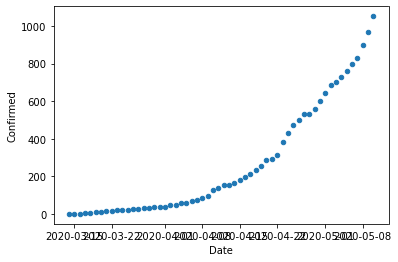

In [5]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

<AxesSubplot:xlabel='Date', ylabel='ln(confirmed)'>

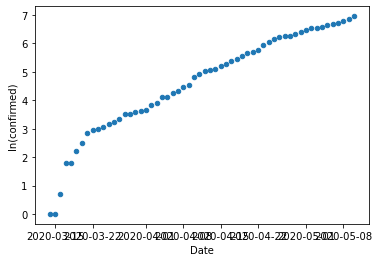

In [6]:
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")

<AxesSubplot:xlabel='Date', ylabel='ln(confirmed)'>

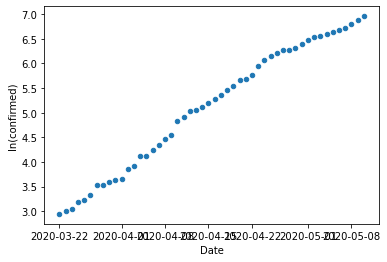

In [7]:
GT_confirmed_post24 = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
GT_confirmed_post24.plot.scatter(x = "Date",y="ln(confirmed)")

In [10]:
def date_to_int(_date_):
    return int('{0}{1:02d}{2:02d}'.format(_date_.year,_date_.month,_date_.day))

In [11]:
first_occurr = date_to_int(GT_confirmed_post24['Date'].iloc[0])
first_occurr

20200322

In [12]:
last_ocurr = date_to_int(GT_confirmed_post24['Date'].iloc[-1])
last_ocurr

20200510

In [13]:
#convirtiendo las fechas a numero:
GT_confirmed_post24['Date_number']= GT_confirmed_post24.apply(lambda row : date_to_int(row['Date'])-first_occurr, axis = 1)
GT_confirmed_post24

<ipython-input-13-450df5a99073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GT_confirmed_post24['Date_number']= GT_confirmed_post24.apply(lambda row : date_to_int(row['Date'])-first_occurr, axis = 1)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(confirmed),Date_number
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439,0
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732,1
16491,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,1,0,3.044522,2
16755,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,1,4,3.178054,3
17019,NaN,Guatemala,15.7835,-90.2308,2020-03-26,25,1,4,3.218876,4
17283,NaN,Guatemala,15.7835,-90.2308,2020-03-27,28,1,4,3.332205,5
17547,NaN,Guatemala,15.7835,-90.2308,2020-03-28,34,1,10,3.526361,6
17811,NaN,Guatemala,15.7835,-90.2308,2020-03-29,34,1,10,3.526361,7
18075,NaN,Guatemala,15.7835,-90.2308,2020-03-30,36,1,10,3.583519,8
18339,NaN,Guatemala,15.7835,-90.2308,2020-03-31,38,1,12,3.637586,9


In [14]:
date_to_int(GT_confirmed_post24['Date'].iloc[-1])

20200510

In [15]:
m,b = return_liner_model_with_scikit(GT_confirmed_post24['Date_number'].values,GT_confirmed_post24['ln(confirmed)'].values)
print(m,b)

[0.0199919] 3.2396796521495776


In [9]:
def covid_predicction(date_to_infer):
    '''
        Recibe el parametro en formato string
      lo convierte a date para inferir,
      @date_to_infer: debe venir año-mes-dia eje: 2020-01-01
  '''
    date_to_infer = datetime.strptime(date_to_infer, '%Y-%m-%d')
    int_date = date_to_int(date_to_infer) - first_occurr
    print(int_date)
    return int(np.exp(m[0] * int_date + b))

In [16]:
#2020-04-09 , 95
from datetime import datetime

In [17]:
#Estimación de casos confirmados para el 30 de mayo de 2020
covid_predicction('2020-05-30')

208


1632

### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [23]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [24]:
data_wine = pd.read_csv('winequality-red.csv')
data_wine
#pd.read_csv('/content/gdrive/MyDrive/statistical_learning1/Practica_2/covid_19_clean_complete.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [25]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
def graph_corr_matrix(data):
    corrMatrix = data.corr()
    print(corrMatrix)
    sn.heatmap(corrMatrix, annot=True)
    plt.show()
    return corrMatrix

Vamos a visualizar la correlacion que existe entre la variable qualitiy con las demas
Para ello vamos a utilizar seaborn y df.corr()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

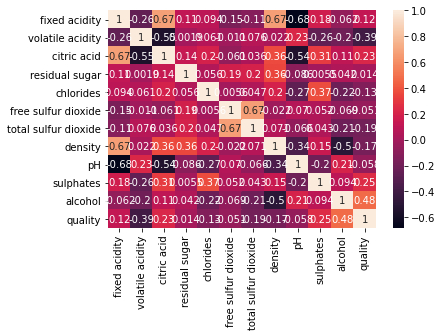

In [31]:
corrMatrix = graph_corr_matrix(data_wine)

Ya que tenemos la matriz de correlación vamos a utilizar las variables con mayor numero de correlación respecto a la variable quality.

In [32]:
posibles = corrMatrix[-1: :]
posibles

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.1851,-0.174919,-0.057731,0.251397,0.476166,1.0


Vamos a trabajar con 3 variables independientes, estas ordenadas de mayor a menor nos queda:


*   Alcohol
*   Volatile acitidy 
*   sulpahtes

Entonces vamos a generar un nuevo dataframe filtrando solo estas variables:


In [33]:
wine = data_wine[['quality','alcohol','volatile acidity','sulphates']]
wine

,quality,alcohol,volatile acidity,sulphates
0,5,9.4,0.700,0.56
1,5,9.8,0.880,0.68
2,5,9.8,0.760,0.65
3,6,9.8,0.280,0.58
4,5,9.4,0.700,0.56
...,...,...,...,...
1594,5,10.5,0.600,0.58
1595,6,11.2,0.550,0.76
1596,6,11.0,0.510,0.75
1597,5,10.2,0.645,0.71


                   quality   alcohol  volatile acidity  sulphates
quality           1.000000  0.476166         -0.390558   0.251397
alcohol           0.476166  1.000000         -0.202288   0.093595
volatile acidity -0.390558 -0.202288          1.000000  -0.260987
sulphates         0.251397  0.093595         -0.260987   1.000000


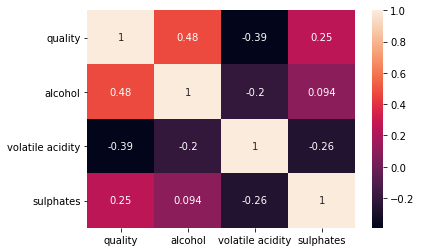

,quality,alcohol,volatile acidity,sulphates
quality,1.000000,0.476166,-0.390558,0.251397
alcohol,0.476166,1.000000,-0.202288,0.093595
volatile acidity,-0.390558,-0.202288,1.000000,-0.260987
sulphates,0.251397,0.093595,-0.260987,1.000000


In [34]:
graph_corr_matrix(wine)

In [119]:
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures as poly

In [120]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [121]:
class Modelo:
    
    #necesito tener los pesos
    def __init__(self, num_features):
        self.w = tf.get_variable("w", dtype  =tf.float32, shape=[1,num_features], initializer = tf.zeros_initializer())
    
    def generate_model(self, vec_x):
        with tf.name_scope("modelo"):
            return tf.matmul(self.w,x)
    
    def error_function(x, y):
        with tf.name_scope("error_function"):
            #evalua el nuevo y genera el y estimado
            y_hat = self.generate_model(x)
            error = tf.math.pow((y - y_hat),2)/2
            return tf.math.reduce_mean(error)
            
    
    def parameters_update(self, x, y, lr):
        #generar el error de la corrida
        with tf.name_scope("error"):
            err = self.error_function(x,y)
            error_summary = tf.summary.scalar(name ="error_promedio", tensor=err)
        #la actualizacion del gradiente 
        with tf.name_scope("gradients_update"):
            grad = tf.gradients(err, [self.w])
            update = tf.assing(self.w, self.w - lr*grad[0])
        return update, err, error_sumary #retorno los nuevos valores de los gradientes y el error para escribir
   

In [122]:
def return_polynomial_transformation(vec_x,degree):
    return poly(degree).fit_transform(vec_x)

In [131]:
def regresion_muti_variable(vec_x,vec_y, epochs,lr, degree, pre=10):
    
    #aplicamos transformacion de variables
    vec_x = return_polynomial_transformation(vec_x)
    
    tf.reset_default_graph()
    g = tf.Graph()
    
    with g.as_default():
        #ejemplo de escritura: lr=0.1_polinomio_grado=2
        writer = tf.summary.FileWriter('./graphs/lr='+str(lr)+'polinomio_grado={0}'.format(degree), g)
        model = Model(vec_x.shape[1])
        x = tf.placeholder("float", shape=[vec_x.shape[0],vec_x.shape[1]], name="X")
        y = tf.placeholder("float", shape=[vec_x.shape[0]],name="Y")
        l_r = tf.placeholder("float", name ="lr")
        update = model.parameters_update(x,y,lr)
        
        
        with tf.train.MonitoredSession() as session:
            feed_dict = {x:vec_x,y:vec_y,l_r:lr}
            
            for epoch in range(epochs):
                params, err, summary = session.run(update,feed_dict=feed_dict)
                writer.add_summary(summary, epoch)
                
                if epoch%pre:
                    print("ERROR:{0}, ITERACION: {1}, PARAMETROS:{2}".format(err,epoch,params))
    